In [1]:
import os
import pandas as pd
import numpy as np

In [9]:
#adding all transcripts into a list
transcript=[]
for root, dirs, files in os.walk('audio_transcription/unclean_transcription_all/'):
    for f in files:
        filepath = os.path.join(root,f)
        file = open(filepath,'r', encoding = "UTF-8")
        read = ''.join(file.readlines())
        transcript.append(read)


In [10]:
#adding all wavfilename into a list
wavfilename=[]

for root, dirs, files in os.walk('audio_transcription/resampled_audio/'):
    for f in files:
        if f[:3]=='res':
            name=f[:-4]
            wavfilename.append(name)
  

In [12]:
#creating dataframe
df = pd.DataFrame()
df['wav_filename'] = wavfilename
df['transcript'] = transcript
df.head()

,wav_filename,transcript
0,resampled_audio_0,THOUSAND ONE NINETY WE (QUOTE LL) GIVE YOU THA...
1,resampled_audio_1,THANKS BIZEX THREE TWENTY NINE TURN LEFT HEADI...
2,resampled_audio_10,WE (QUOTE RE) LOOKING FOR THAT TRAFFIC THREE T...
3,resampled_audio_100,NORTHWEST ELEVEN SEVENTY EIGHT MAINTAIN SPEED ...
4,resampled_audio_1000,CLIPPER SIXTY FIVE FORTY BOSTON APPROACH THANK...


In [13]:
#changing all to lower case
df['transcript'] = df['transcript'].str.lower()
df.head()

,wav_filename,transcript
0,resampled_audio_0,thousand one ninety we (quote ll) give you tha...
1,resampled_audio_1,thanks bizex three twenty nine turn left headi...
2,resampled_audio_10,we (quote re) looking for that traffic three t...
3,resampled_audio_100,northwest eleven seventy eight maintain speed ...
4,resampled_audio_1000,clipper sixty five forty boston approach thank...


In [14]:
#removing all unnecessary words and replacing certain words
for i in range(len(df)):
    if '[fragment]' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('[fragment]','')
    if '[hnoise]' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('[hnoise]','')
    if '[noise]' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('[noise]','')
    if '(quote re)' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(quote re)','')
    if '(quote ll)' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(quote ll)','')
    if '@' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('@','')
    if '(quote clock)' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(quote clock)','')
    if '~' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('~','')
    if '<ot>' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('<ot>','')
    if '=' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('=','')
    if '</ot>' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('</ot>','')
    if '[air]' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('[air]','')
    if '+' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('+','')
    if '[ground]' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('[ground]','')
    if '[ground_|]' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('[ground_|]','')
    if '[air_|]' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('[air_|]','')
    if '[|_ground]' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('[|_ground]','')
    if '\n' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('\n','')
    if '[|_air]' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('[|_air]','')
    if '(munchen (minÃ¨n))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(munchen (minÃ¨n))',' munchen ')
    if '(airbridge cargo (Ã©rbridÂž kargo))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace(' (airbridge cargo (Ã©rbridÂž kargo))',' airbridge cargo ')
    if '[speaker]' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('[speaker]','')
    if '(9(nÃ¡jn))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(9(nÃ¡jn))',' 9 ')
    if '(9(najn))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(9(najn))',' 9 ')
    if '(etiopian (ejtyjopen))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(etiopian (ejtyjopen))',' etiopian ')
    if '(quote s)' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(quote s)','')
    if '(9(nájn))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(9(nájn))',' 9 ')
    if '-' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('-','')
    if '(dme (dÃ­ em Ã­))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(dme (dÃ­ em Ã­))',' unintelligible ')  
    if '[unintelligible]' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('[unintelligible]',' unintelligible ')
    if '[unintelligible_|]' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('[unintelligible_|]',' unintelligible ')
    if '[|_unintelligible]' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('[|_unintelligible]',' unintelligible ')   
    if '(praha(prÃ¡g))[unintelligible]' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(praha(prÃ¡g))[unintelligible]',' unintelligible ')   
    if '(vienna(vín))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(vienna(vín))',' vienna ')
    if '(praha(prÃ¡g))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(praha(prÃ¡g))',' unintelligible ') 
    if '[no_eng_|]czeÂœÃ¦[|_no_eng]' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('[no_eng_|]czeÂœÃ¦[|_no_eng]',' unintelligible ')   
    if '[no_eng_|]czeÂœÃ¦[|_no_eng]' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('[no_eng_|]czeÂœÃ¦[|_no_eng]',' unintelligible ')
    if '[no_eng_|]Ã¨eÂšÂ[|_no_eng]' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('[no_eng_|]Ã¨eÂšÂ[|_no_eng]',' unintelligible ')   
    if '[no_eng_|]Ã¨eÂšÂ[|_no_eng]' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('[no_eng_|]Ã¨eÂšÂ[|_no_eng]',' unintelligible ')
    if 'ruzynì' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('ruzynì',' unintelligible ')
    if '[no_eng_|]tschüss[|_no_eng]' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('[no_eng_|]tschüss[|_no_eng]',' unintelligible ')
    if 'ruyznì' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('ruyznì',' unintelligible ')
    if '[no_eng_|]èe\x9a\x9d[|_no_eng]' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('[no_eng_|]èe\x9a\x9d[|_no_eng]',' unintelligible ')
    if '(c (sí))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(c (sí))',' unintelligible ')
    if '(praha(prág))[unintelligible]' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(praha(prág))[unintelligible]',' unintelligible ')
    if '(majestic (madestyk))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(majestic (madestyk))',' unintelligible ')
    if '(yes (jé))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(yes (jé))',' unintelligible ')
    if '[no_eng_|]czeæ[|_no_eng]' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('[no_eng_|]czeæ[|_no_eng]',' unintelligible ')
    if '(munich (minn))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(munich (minn))',' unintelligible ')
    if '[unintelligible]dejnks[unintelligible]' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('[unintelligible]dejnks[unintelligible]',' unintelligible ')
    if '´' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('´',"'")
    if '([unintelligible](ruzín))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('([unintelligible](ruzín))',' unintelligible ')
    if '[unintelligible]dobrý' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('[unintelligible]dobrý',' unintelligible ')
    if '(munchen ( minn))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(munchen ( minn))',' munchen ')
    if '(virgin (vrdin))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(virgin (vrdin))',' virgin ')
    if '(praha(prág))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(praha(prág))',' praha ')
    if '[unintelligible]díky[unintelligible]' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('[unintelligible]díky[unintelligible]',' unintelligible ')
    if '¨' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('¨','')
    if '(dme (dí em í))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(dme (dí em í))',' unintelligible ')
    if '(through (drù)) ' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(through (drù)) ',' unintelligible ')
    if '(qnh(kjùenejè))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(qnh(kjùenejè))',' q n h ')
    if '(air china (erèajna))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(air china (erèajna))',' air china ')
    if '(ups (jù pí es))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(ups (jù pí es))',' u p s ')
    if '(vinair (vinér))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(vinair (vinér))',' vinair ')
    if '[no_eng_|]dìn dobrý[|_no_eng][unintelligible]' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('[no_eng_|]dìn dobrý[|_no_eng][unintelligible]',' unintelligible ')
    if '(munich (minen))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(munich (minen))',' munich ')
    if '°' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('°',' degree ')
    if '(air berlin(berlin))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(air berlin(berlin))',' berlin ')
    if '(unintelligible)' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(unintelligible)',' unintelligible ')
    if '(praha(prague))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(praha(prague))',' unintelligible ')
    if '(rhein(rajn))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(rhein(rajn))',' rhein ')
    if '(thomson (tomson))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(thomson (tomson))',' thomson ')
    if '(ascot (askot))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(ascot (askot))',' ascot ')
    if '(x (iks))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(x (iks))',' x ')
    if '(quote m)' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(quote m)','')
    if '(munich (minchn))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(munich (minchn))',' munich ')
    if '(silver arrows (silvr erous))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(silver arrows (silvr erous))',' silver arrows ')
    if '(el al (elal))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(el al (elal))',' unintelligible ')
    if '(dynasty (dajnasty))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(dynasty (dajnasty))',' dynasty ')
    if '(navigator (navigejtr))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(navigator (navigejtr))',' navigator ')
    if '(radar(radar))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(radar(radar))',' radar ')
    if '(midland (midlend))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(midland (midlend))',' midland ')
    if '(omelo (emelo))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(omelo (emelo))',' omelo ')
    if '(0 (ou))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(0 (ou))',' 0 ')
    if '(dynasty (dajnasty))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(dynasty (dajnasty))',' dynasty ')
    if '(praha(praga))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(praha(praga))',' praha ')
    if '(munich(minchen))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(munich(minchen))',' munich ')
    if '(hamburk(hambruk))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(hamburk(hambruk))',' hamburk ')
    if '(praha(prag))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(praha(prag))',' praha ')
    if '(wien (vijena))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(wien (vijena))',' unintelligible ' )
    if '(a (ej))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(a (ej))',' a ')
    if '(quote ll' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(quote ll','')
    if '(munich(mynchen))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(munich(mynchen))',' munich ')
    if '(munich (minchen))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(munich (minchen))',' munich ')
    if '(h(otel))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(h(otel))',' hotel ')
    if '(sequence(sekvenc))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(sequence(sekvenc))',' sequence ')
    if '(praha (praga))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(praha (praga))',' praha ')
    if '(yes (je))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(yes (je))',' yes ')
    if '(fly niki (flaj nyky))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(fly niki (flaj nyky))',' fly niki ')
    if '(contract (kontrakt))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(contract (kontrakt))',' contract ')
    if '(siberia (siberyja))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(siberia (siberyja))',' siberia ')
    if '(munchen (minchn)' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(munchen (minchn)',' munchen ')
    if '(radar (radar))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(radar (radar))',' radar ')
    if '(praha (praga))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(praha (praga))',' praha ')
    if '(cargolux (kargolux))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(cargolux (kargolux))',' cargolux ')
    if '(contract (kontrakt))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(contract (kontrakt))',' contract ')
    if '(rhein (rajn))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(rhein (rajn))',' rhein ')
    if '(x(eks))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(x(eks))',' x ')
    if '(f(fox))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(f(fox))',' fox ')
    if '(0(ou))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(0(ou))',' 0 ')
    if '( sa (sej))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('( sa (sej))',' unintelligible ')
    if '(russia (rasija))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(russia (rasija))',' russia ')
    if 'munchen)' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('munchen)',' unintelligible ')
    if '(mun (min))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(mun (min))',' unintelligible ')
    if '(munich(mjunyk))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(munich(mjunyk))',' munich ')
    if '(vienna (vijena))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(vienna (vijena))',' vienna ')
    if '(8 (neight))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(8 (neight))',' 8 ')
    if '(heading(eding))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(heading(eding))',' heading ')
    if '(eading(eding))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(eading(eding))',' heading ')
    if '(radar(rejdr))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(radar(rejdr))',' radar ')
    if '(il (ajel))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(il (ajel))',' il ')
    if '(i (aj))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(i (aj))',' unintelligible ')
    if '(f(foks))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(f(foks))',' f ')
    if '(heading (hidink))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(heading (hidink))',' heading ')
    if '(fl(flight level))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(fl(flight level))',' flight level ')
    if '(again(egan))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(again(egan))',' again ')
    if '(munich(mynchn))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(munich(mynchn))',' munich ')
    if '(9 (najt))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(9 (najt))',' 9 ')
    if '(tower(tavr))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(tower(tavr))',' tower ')
    if '(own (avn))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(own (avn))',' own ')
    if 'radar(rejda))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('radar(rejda))',' radar ')
    if '(radar(rrradar))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(radar(rrradar))',' radar ')
    if '(short pause)' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(short pause)','')
    if '( m (em))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('( m (em))',' m ')
    if '(yes (jea))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(yes (jea))',' yes ')
    if '(radar' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(radar',' radar ')
    if '(quote t)' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(quote t)','')
    if '(apron (ejpron))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(apron (ejpron))',' apron ')
    if '(llz(localizer))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(llz(localizer))',' localizer ')
    if '[czech_|] dobrý den[czech]' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('[czech_|] dobrý den[|_czech]',' unintelligible ')
    if '[czech_|]dobrý den[|_czech] ' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('[czech_|]dobrý den[|_czech] ',' unintelligible ')
    if '[czech_|]ahoj[|_czech]' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('[czech_|]ahoj[|_czech]',' ahoj ')
    if '[czech_|]nasly[|_czech]' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('[czech_|]nasly[|_czech]',' nasly ')
    if '[czech_|]dobrý veèer[|_czech]' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('[czech_|]dobrý veèer[|_czech]',' unintelligible ')
    if '[czech_|]díky ahoj[|_czech]' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('[czech_|]díky ahoj[|_czech]',' diky ahoj ')
    if '[czech_|]dobrý veèer[|_czech]' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('[czech_|]dobrý veèer[|_czech] ',' unintelligible ')
    if '[czech_|]naslyenou[|_czech]' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('[czech_|]naslyenou[|_czech]',' unintelligible ')
    if '[czech_|]vlaim[|_czech]' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('[czech_|]vlaim[|_czech]',' unintelligible ')
    if '[czech_|]na slyenou[|_czech]' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('[czech_|]na slyenou[|_czech] ',' unintelligible ')
    if '[czech_|] dobrý den [|_czech]' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('[czech_|] dobrý den [|_czech]',' unintelligible ')
    if '[czech_|]èau[|_czech]' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('[czech_|]èau[|_czech]',' unintelligible ')
    if '[czech_|]dobrý den praho[|_czech]' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('[czech_|]dobrý den praho[|_czech]',' unintelligible ')
    if '[czech_|]na slyenou[|_czech]' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('[czech_|]na slyenou[|_czech]',' unintelligible ')
    if '[czech_|] varava[|_czech]' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('[czech_|] varava[|_czech]',' unintelligible ')
    if '[czech_|]dobré ráno[|_czech]' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('[czech_|]dobré ráno[|_czech]',' unintelligible ')
    if '[czech_|] dobrý veèer [|_czech]' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('[czech_|] dobrý veèer [|_czech]',' unintelligible ')      
    if '(warsaw (varava))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(warsaw (varava))', 'warsaw ')
    if '[czech]hezký den[czech]' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('[czech]hezký den[czech]',' unintelligible ')
    if '[czech_|]dobrý den [|_czech]' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('[czech_|]dobrý den [|_czech]',' unintelligible ')
    if '[czech_|]dobrý den[|_czech]' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('[czech_|]dobrý den[|_czech]',' unintelligible ') 
    if '(american (mericken))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(american (mericken))',' american ')
    if '(germania (germánija)) ' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(germania (germánija)) ',' germania ')
    if '[czech] dobrý veèer[czech]' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('[czech] dobrý veèer[czech]',' unintelligible ')
    if '[czech_|]hezký den[|_czech]' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('[czech_|]hezký den[|_czech]',' unintelligible ') 
    if '(qnh(kjùenejdè)) ' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(qnh(kjùenejdè)) ',' q n h ')
    if '(turn(tùr))' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('(turn(tùr))',' turn ')
    if '[ehm_??]' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('[ehm_??]',' ehm ')
    if '[czech_|] nasly [|_czech]' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('[czech_|] nasly [|_czech]',' nasly ')
    if '[czech_|] ahoj [|_czech]' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('[czech_|] ahoj [|_czech]',' ahoj ')
    if '[unknown]' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('[unknown]',' unintelligible ')
    if '[nonsense]' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('[nonsense]',' unintelligible ')
    if '[|_noise]' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('[|_noise]','')
    if '[noise_|]' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('[noise_|]','')
    if '?' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('?','')
    if '[background_speech_|]' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('[background_speech_|]','')
    if '[|_background_speech]' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('[|_background_speech]','')
    if '[background_speech]' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('[background_speech]','')     
    if 'rwy' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('rwy',' runway ')
    if ' fl ' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace(' fl ',' flight level ')

In [15]:
#changing all numbers to words
for i in range(len(df)):
    if '0' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('0',' zero ')
    if '1' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('1',' one ')
    if '2' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('2',' two ')
    if '3' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('3',' three ')
    if '4' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('4',' four ')
    if '5' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('5',' five ')
    if '6' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('6',' six ')
    if '7' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('7',' seven ')
    if '8' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('8',' eight ')
    if '9' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('9',' nine ')
    if 'unintelligible' in df['transcript'][i]:
        df['transcript'][i] = df['transcript'][i].replace('unintelligible',' ')

In [ ]:
#removing utterances that have random symbols
characters = [x for x in "abcdefghijklmnopqrstuvwxyz.' "]
count=0
for i in range(len(df)):
    
    for letter in df['transcript'][i]:
        if letter in characters:
            pass
        else:
            print(letter,df['wav_filename'][i],df['transcript'][i])
            count+=1
            df.drop([i], inplace = True) 
            break
                
df=df.reset_index(drop=True)          
print(count)

In [19]:
#removing random spaces in the utterances
for i in range(len(df)):
    df['transcript'][i] = ' '.join(df['transcript'][i].split())
df.head(10)

,wav_filename,transcript
0,resampled_audio_0,thousand one ninety we give you that on the sp...
1,resampled_audio_1,thanks bizex three twenty nine turn left headi...
2,resampled_audio_10,we looking for that traffic three twenty nine
3,resampled_audio_100,northwest eleven seventy eight maintain speed ...
4,resampled_audio_1000,clipper sixty five forty boston approach thank...
5,resampled_audio_10000,alitalia six four seven four own navigation tr...
6,resampled_audio_10001,k l m three four six heading of three five zero
7,resampled_audio_10002,lufthansa five three zero five heading three f...
8,resampled_audio_10003,german air force four one four climb flight le...
9,resampled_audio_10004,that's correct german air force four one four ...


In [20]:
#removing utterances that are fully unintelligible or non english
count = 0
for i in range(len(df)):
    if df['transcript'][i] == 'unintelligible' or df['transcript'][i] == 'unintelligible unintelligible' or df['transcript'][i] == 'unintelligible unintelligible unintelligible':
        print(df['wav_filename'][i],df['transcript'][i])
        df.drop([i], inplace = True) 
        count+=1
df=df.reset_index(drop=True)
print(count)

0


In [ ]:
#removing empty utterances
count = 0
for i in range(len(df)):
    if df['transcript'][i] == '[empty]' or df['transcript'][i] == '':
        print(df['wav_filename'][i],df['transcript'][i])
        df.drop([i], inplace = True) 
        count+=1
df=df.reset_index(drop=True)
print(count)

In [22]:
df

,wav_filename,transcript
0,resampled_audio_0,thousand one ninety we give you that on the sp...
1,resampled_audio_1,thanks bizex three twenty nine turn left headi...
2,resampled_audio_10,we looking for that traffic three twenty nine
3,resampled_audio_100,northwest eleven seventy eight maintain speed ...
4,resampled_audio_1000,clipper sixty five forty boston approach thank...
...,...,...
20548,resampled_audio_9995,that's correct german air force four one four ...
20549,resampled_audio_9996,air berlin five two five five contact rhein co...
20550,resampled_audio_9997,k l m three four six recleared flight level th...
20551,resampled_audio_9998,french line nine one six five good morning rad...


In [4]:
#save to csv file
df.to_csv('metadata.csv',encoding='utf-8')

## Visualisation of dataset

In [5]:
import  os
from scipy.io import wavfile
import pandas as pd

In [6]:
df=pd.read_csv('metadata.csv')

23.120236482741266


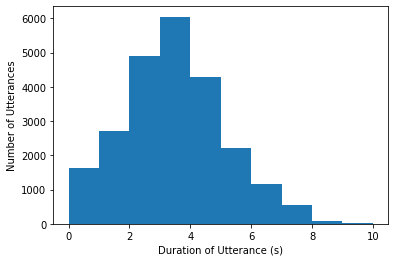

In [8]:
#number of utterances vs duration
duration=[]

for name in df['wav_filename']:
    filepath = os.path.join('audio_transcription/resampled_audio', name+'.wav')
    rate, data = wavfile.read(filepath)
    time = len(data)/rate
    duration.append(time)

total_duration = sum(duration)/3600
print (total_duration)

plt.hist(duration, bins = [0,1,2,3,4,5,6,7,8,9,10])
plt.ylabel('Number of Utterances')
plt.xlabel('Duration of Utterance (s)')
plt.show()

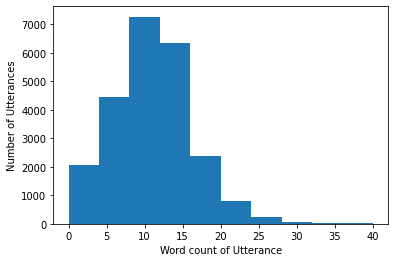

In [9]:
#number of utterances vs word count
word_count=[]
for i in df['transcript']:
    word_count.append(len(i.split()))
    
plt.hist(word_count, bins = [0,4,8,12,16,20,24,28,32,36,40])
plt.ylabel('Number of Utterances')
plt.xlabel('Word count of Utterance')
plt.show()

## Resampling to 22050

In [ ]:
import soundfile as sf
import librosa
for root, dirs, files in os.walk('unclean_audio_all/'):
    for f in files:
        filepath=os.path.join(root,f)
        
        y, sr = librosa.load(filepath)
        print(filepath,y,sr)
        sf.write('resampled_'+f, y, sr)
  

## Removing background noise

In [7]:
from scipy.io import wavfile
import noisereduce as nr

C:\Users\Leston\anaconda3\envs\deepspeech2\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
#test
rate, data = wavfile.read("audio_transcription/resampled_audio/resampled_audio_1.wav")
# perform noise reduction
reduced_noise = nr.reduce_noise(y=data, sr=rate)
wavfile.write("test.wav", rate, reduced_noise)

In [10]:
#creating no noise audio wav based on training set
metadata_path = 'metadata.csv'
metadata_df = pd.read_csv(metadata_path)
metadata_df.drop(columns=metadata_df.columns[0], axis=1, inplace=True)
metadata_df = metadata_df.sample(frac=1,random_state=0).reset_index(drop=True)

split1 = int(len(metadata_df) * 0.85) #85% training set
split2 = int(len(metadata_df) * 0.95) #10% validation set 5% test set
df_train = metadata_df[:split1]

for root, dirs, files in os.walk('audio_transcription/resampled_audio/'):
    for f in files:
        print(f[:-4])
        if f[:-4] in df_train['wav_filename'].tolist():   
            filepath=os.path.join(root,f)
            rate, data = wavfile.read(filepath)
            reduced_noise = nr.reduce_noise(y=data, sr=rate)
            wavfile.write('nonoise_audio_'+f[16:], rate, reduced_noise)

In [ ]:
#creating no_noise metadata 100%
metadata_nonoise_train=df_train.copy(deep=True)

for root, dirs, files in os.walk('audio_transcription/resampled_audio/'):
    for f in files:
        print(f[:-4])
        try:
            if f[:7] =='nonoise':
                index= metadata_nonoise_train.index[metadata_nonoise['wav_filename'] == 'resampled_audio_' + f[14:-4]].to_list()[0]
                new_row={'wav_filename':f[:-4],'transcript':metadata_nonoise_train['transcript'][index]}
                metadata_nonoise_train=metadata_nonoise_train.append(new_row,ignore_index=True) 
                
        except:
            pass
metadata_nonoise_train.reset_index(inplace=True,drop=True)

In [ ]:
#creating no_noise metadata 50%
metadata_path = 'metadata.csv'
metadata_df = pd.read_csv(metadata_path)
metadata_df.drop(columns=metadata_df.columns[0], axis=1, inplace=True)
metadata_df = metadata_df.sample(frac=1,random_state=0).reset_index(drop=True)

split1 = int(len(metadata_df) * 0.85) #85% training set
split2 = int(len(metadata_df) * 0.95) #10% validation set 5% test set
df_train = metadata_df[:split1]
df_train = df_train.sample(frac=1,random_state=69).reset_index(drop=True)
metadata_nonoise_train=df_train.copy(deep=True)

for i in range(round(len(df_train)/2)):
    new_row={'wav_filename':'nonoise_audio_'+df_train['wav_filename'][i][16:],'transcript':df_train['transcript'][i]}
    print(i,new_row)
    metadata_nonoise_train=metadata_nonoise_train.append(new_row,ignore_index=True)

In [13]:
metadata_nonoise_train.to_csv('metadata_nonoise50%_train.csv',encoding='utf-8',index=False)
metadata_nonoise_train

,wav_filename,transcript
0,resampled_audio_19980,sudan air eight five zero zero
1,resampled_audio_16139,approv
2,resampled_audio_12587,one two seven one two five good bye austrian t...
3,resampled_audio_10247,lufthansa five three one eight good afternoon ...
4,resampled_audio_10541,so can you kill the japanair then
...,...,...
30208,nonoise_audio_1165,bonjour l t u seven seven five six call you ba...
30209,nonoise_audio_7036,lufthansa four seven two three good morning roger
30210,nonoise_audio_432,delta seventeen seventy six maintain four thou...
30211,nonoise_audio_24683,p l g and stand five one wizzair four


## Time Stretch

In [1]:
import librosa
import os
import pandas as pd
import numpy as np
from scipy.io import wavfile
def time_stretch(signal, time_stretch_rate):
    return librosa.effects.time_stretch(signal, time_stretch_rate)

In [ ]:
#test
data, rate = librosa.load("test1.wav")
# perform noise reduction
audio=time_stretch(data,np.random.uniform(0.7,1.3))
wavfile.write("test.wav", rate, audio)

In [ ]:
#creating timestretch audio based on training set
metadata_path = 'metadata.csv'
wavs_path = 'audio_transcription/resampled_audio/'
metadata_df = pd.read_csv(metadata_path)
metadata_df.drop(columns=metadata_df.columns[0], axis=1, inplace=True)
metadata_df = metadata_df.sample(frac=1,random_state=0).reset_index(drop=True)

split1 = int(len(metadata_df) * 0.85) #85% training set
split2 = int(len(metadata_df) * 0.95) #10% validation set 5% test set
df_train = metadata_df[:split1]
df_train = df_train.sample(frac=1,random_state=0).reset_index(drop=True)
df_train

for i in range(int(len(df_train['wav_filename']))):
    print(i)
    data, rate = soundfile.read(wavs_path + df_train['wav_filename'][i] +'.wav')
    audio=time_stretch(data,np.random.uniform(0.7,1.3))
    soundfile.write('timestretch_audio_'+df_train['wav_filename'][i][16:]+'.wav', data, rate, subtype='PCM_16')

In [ ]:
#creating timestretch+nonoise train metadata

metadata_nonoise_train=pd.read_csv('metadata_nonoise_train.csv')

for root, dirs, files in os.walk('audio_transcription/resampled_audio/'):
    for f in files:
        try:
            if f[:4] =='time':
                print(f)
                index= df_train.index[df_train['wav_filename'] == 'resampled_audio_' + f[18:-4]].to_list()[0]
                new_row={'wav_filename':f[:-4],'transcript':df_train['transcript'][index]}
                metadata_nonoise_train=metadata_nonoise_train.append(new_row,ignore_index=True) 

        except:
            pass
metadata_nonoise_train.reset_index(inplace=True,drop=True)


In [4]:
metadata_nonoise_train.to_csv('metadata_nonoise100%+timestretch100%_train.csv',encoding='utf-8',index=False)
metadata_nonoise_train

,wav_filename,transcript
0,resampled_audio_14440,air berlin eight four three nine
1,resampled_audio_25292,csa six three five runway three one clear to l...
2,resampled_audio_8178,hapag lloyd three five five one descend now to...
3,resampled_audio_4829,sunwing five two one two contact zurich one th...
4,resampled_audio_12516,eurotrans four eight zero
...,...,...
60421,timestretch_audio_9995,that's correct german air force four one four ...
60422,timestretch_audio_9996,air berlin five two five five contact rhein co...
60423,timestretch_audio_9997,k l m three four six recleared flight level th...
60424,timestretch_audio_9998,french line nine one six five good morning rad...


## Pitch scale

In [3]:
import librosa
import IPython.display
import numpy as np
import pandas as pd
import soundfile
import os

def pitch_scale(signal, sr, num_semitones):
    return librosa.effects.pitch_shift(signal, sr, num_semitones)

In [17]:
#test
data, rate = soundfile.read('audio_transcription/resampled_audio/resampled_audio_12978.wav')

# perform noise reduction
audio=pitch_scale(data, rate,2.86)
IPython.display.Audio(audio, rate=rate)

C:\Users\Leston\AppData\Local\Temp\ipykernel_24656\386493635.py:8: FutureWarning: Pass sr=22050, n_steps=2.86 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.pitch_shift(signal, sr, num_semitones)


In [2]:
#creating pitchscale audio based on training set
metadata_path = 'metadata.csv'
wavs_path = 'audio_transcription/resampled_audio/'
metadata_df = pd.read_csv(metadata_path)
metadata_df.drop(columns=metadata_df.columns[0], axis=1, inplace=True)
metadata_df = metadata_df.sample(frac=1,random_state=0).reset_index(drop=True)

split1 = int(len(metadata_df) * 0.85) #85% training set
split2 = int(len(metadata_df) * 0.95) #10% validation set 5% test set
df_train = metadata_df[:split1]
df_train = df_train.sample(frac=1,random_state=1).reset_index(drop=True)
df_train

for i in range(round(len(df_train['wav_filename'])/2)):
    print(df_train['wav_filename'][i][16:])
    data, rate = librosa.load(wavs_path + df_train['wav_filename'][i] +'.wav')
    audio=pitch_scale(data, rate,np.random.uniform(-3,3))
    wavfile.write('pitchscale_audio_'+df_train['wav_filename'][i][16:]+'.wav', rate, audio)

,wav_filename,transcript
0,resampled_audio_13536,beline five three d direct to isama
1,resampled_audio_8302,l t u seven seven five six i'll call you back ...
2,resampled_audio_24973,csa four two zero ruzyne tower line up runway ...
3,resampled_audio_21971,speed two fifty cimber three five two f
4,resampled_audio_7499,lufthansa four seven two three descend to flig...
...,...,...
20137,resampled_audio_7626,lufthansa four six five two right heading two ...
20138,resampled_audio_1106,aero lloyd five one seven turn right to willisau
20139,resampled_audio_14707,direct bumil zero nine h
20140,resampled_audio_23100,csa four v p tower roger


In [ ]:
#creating nonoise+timestretch+pitchscale train metadata
metadata_nonoise_timestretch_train=pd.read_csv('metadata_nonoise_train.csv')


for root, dirs, files in os.walk('audio_transcription/resampled_audio/'):
    for f in files:
        try:
            if f[:5] =='pitch':
                print(f)
                index= df_train.index[df_train['wav_filename'] == 'resampled_audio_' + f[17:-4]].to_list()[0]
                new_row={'wav_filename':f[:-4],'transcript':df_train['transcript'][index]}
                print(new_row)
                metadata_nonoise_timestretch_train=metadata_nonoise_timestretch_train.append(new_row,ignore_index=True) 

        except:
            pass
metadata_nonoise_timestretch_train.reset_index(inplace=True,drop=True)
metadata_nonoise_timestretch_train

In [5]:
metadata_nonoise_timestretch_train.to_csv('metadata_nonoise+pitchscale_train.csv',encoding='utf-8',index=False)
metadata_nonoise_timestretch_train

,wav_filename,transcript
0,resampled_audio_14440,air berlin eight four three nine
1,resampled_audio_25292,csa six three five runway three one clear to l...
2,resampled_audio_8178,hapag lloyd three five five one descend now to...
3,resampled_audio_4829,sunwing five two one two contact zurich one th...
4,resampled_audio_12516,eurotrans four eight zero
...,...,...
50350,pitchscale_audio_9988,thank you you too
50351,pitchscale_audio_999,boston approach clipper sixty five forty at fi...
50352,pitchscale_audio_9995,that's correct german air force four one four ...
50353,pitchscale_audio_9996,air berlin five two five five contact rhein co...


## white noise

In [1]:
import IPython.display
import numpy as np
import pandas as pd
import soundfile
import os

def add_white_noise(signal, noise_percentage_factor):
    noise = np.random.normal(0, signal.std(), signal.size)
    augmented_signal = signal + noise * noise_percentage_factor
    return augmented_signal

In [11]:
#test
data, rate = soundfile.read('audio_transcription/resampled_audio/resampled_audio_12978.wav')

augmented_signal=add_white_noise(data,np.random.uniform(-0.4,0.4))
IPython.display.Audio(data, rate=rate)

In [2]:
#creating whitenoise audio based on training set
metadata_path = 'metadata.csv'
wavs_path = 'audio_transcription/resampled_audio/'
metadata_df = pd.read_csv(metadata_path)
metadata_df.drop(columns=metadata_df.columns[0], axis=1, inplace=True)
metadata_df = metadata_df.sample(frac=1,random_state=0).reset_index(drop=True)

split1 = int(len(metadata_df) * 0.85) #85% training set
split2 = int(len(metadata_df) * 0.95) #10% validation set 5% test set
df_train = metadata_df[:split1]
df_train = df_train.sample(frac=1,random_state=7).reset_index(drop=True)
df_train
count=0
for i in range(int(len(df_train['wav_filename']))):
    print(i,df_train['wav_filename'][i][16:])
    count+=1
    print(count)
    data, rate = soundfile.read(wavs_path + df_train['wav_filename'][i] +'.wav')
    data=add_white_noise(data,np.random.uniform(-0.4,0.4))
    soundfile.write('whitenoise_audio_'+df_train['wav_filename'][i][16:]+'.wav', data, rate, subtype='PCM_16')

In [ ]:
#creating nonoise+timestretch+pitchscale+whitenoise train metadata
metadata_nonoise_timestretch_pitchscale_train=pd.read_csv('metadata_nonoise100%+timestretch100%_train.csv')


for root, dirs, files in os.walk('audio_transcription/resampled_audio/'):
    for f in files:
        try:
            if f[:5] =='white':
                print(f[17:-4])
                index= df_train.index[df_train['wav_filename'] == 'resampled_audio_' + f[17:-4]].to_list()[0]
                new_row={'wav_filename':f[:-4],'transcript':df_train['transcript'][index]}
                print(new_row)
                metadata_nonoise_timestretch_pitchscale_train=metadata_nonoise_timestretch_pitchscale_train.append(new_row,ignore_index=True) 

        except:
            pass
metadata_nonoise_timestretch_pitchscale_train.reset_index(inplace=True,drop=True)
metadata_nonoise_timestretch_pitchscale_train

In [19]:
metadata_nonoise_timestretch_train.to_csv('metadata_nonoise100%+timestretch100%+whitenoise50%_train.csv',encoding='utf-8',index=False)
metadata_nonoise_timestretch_train

,wav_filename,transcript
0,resampled_audio_14440,air berlin eight four three nine
1,resampled_audio_25292,csa six three five runway three one clear to l...
2,resampled_audio_8178,hapag lloyd three five five one descend now to...
3,resampled_audio_4829,sunwing five two one two contact zurich one th...
4,resampled_audio_12516,eurotrans four eight zero
...,...,...
70492,whitenoise_audio_9990,tarom seven five three three contact reims on ...
70493,whitenoise_audio_9991,k l m three four six continue climb flight lev...
70494,whitenoise_audio_9993,go ahead
70495,whitenoise_audio_9996,air berlin five two five five contact rhein co...


## robot voice

In [2]:
import getopt
import numpy as np
import soundfile
import math
import sys
from waveshaper import Waveshaper
import IPython.display
import os
import pandas as pd

"""
Constants
"""

# Diode constants (must be below 1; paper uses 0.2 and 0.4)
VB = 0.2
VL = 0.4

# Controls distortion
H = 4

# Controls N samples in lookup table; probably leave this alone
LOOKUP_SAMPLES = 1024

# Frequency (in Hz) of modulating frequency
MOD_F = 50

def diode_lookup(n_samples):
    result = np.zeros((n_samples,))
    for i in range(0, n_samples):
        v = float(i - float(n_samples)/2)/(n_samples/2)
        v = abs(v)
        if v < VB:
            result[i] = 0
        elif VB < v <= VL:
            result[i] = H * ((v - VB)**2)/(2*VL - 2*VB)
        else:
            result[i] = H*v - H*VL + (H*(VL-VB)**2)/(2*VL-2*VB)

    return result

def raw_diode(signal):
    result = np.zeros(signal.shape)
    for i in range(0, signal.shape[0]):
        v = signal[i]
        if v < VB:
            result[i] = 0
        elif VB < v <= VL:
            result[i] = H * ((v - VB)**2)/(2*VL - 2*VB)
    else:
        result[i] = H*v - H*VL + (H*(VL-VB)**2)/(2*VL-2*VB)
    return result


    """
    Program to make a robot voice by simulating a ring modulator;
    procedure/math taken from
    http://recherche.ircam.fr/pub/dafx11/Papers/66_e.pdf
    """


In [8]:
#creating robot audio based on training set
metadata_path = 'metadata.csv'
wavs_path = 'audio_transcription/resampled_audio/'
metadata_df = pd.read_csv(metadata_path)
metadata_df.drop(columns=metadata_df.columns[0], axis=1, inplace=True)
metadata_df = metadata_df.sample(frac=1,random_state=0).reset_index(drop=True)

split1 = int(len(metadata_df) * 0.85) #85% training set
split2 = int(len(metadata_df) * 0.95) #10% validation set 5% test set
df_train = metadata_df[:split1]
df_train = df_train.sample(frac=1,random_state=47).reset_index(drop=True)
df_train

for i in range(round(len(df_train['wav_filename'])/2)):
    print(df_train['wav_filename'][i][16:])
    data, rate = soundfile.read(wavs_path + df_train['wav_filename'][i] +'.wav')
    
    scaler = np.max(np.abs(data))
    data = data.astype(np.float)/scaler
    n_samples = data.shape[0]
    d_lookup = diode_lookup(LOOKUP_SAMPLES)
    diode = Waveshaper(d_lookup)
    tone = np.arange(n_samples)
    tone = np.sin(2*np.pi*tone*MOD_F/rate)
    tone = tone * 0.5
    tone2 = tone.copy() # to top path
    data2 = data.copy() # to bottom path
    tone = -tone + data2 # bottom path
    data = data + tone2 #top path
    data = diode.transform(data) + diode.transform(-data)
    tone = diode.transform(tone) + diode.transform(-tone)
    result = data - tone
    result /= np.max(np.abs(result))
    result *= scaler
    soundfile.write('robot_audio_'+df_train['wav_filename'][i][16:]+'.wav', data, rate, subtype='PCM_16')

,wav_filename,transcript
0,resampled_audio_25767,and skytravel six eight two stand three ready ...
1,resampled_audio_18202,praha radar csa two d l
2,resampled_audio_19048,southern air eight five zero zero
3,resampled_audio_4256,lufthansa three five five zero contact zurich ...
4,resampled_audio_3961,thank you break scandinavian six eight seven f...
...,...,...
20137,resampled_audio_19910,ok csa five p c
20138,resampled_audio_22919,csa nine seven four runway one three cleared f...
20139,resampled_audio_18376,four thousand qnh one zero two three csa six t...
20140,resampled_audio_24907,one . nine


In [ ]:
#creating nonoise+robot train metadata
metadata_nonoise_train=pd.read_csv('metadata_nonoise_train.csv')


for root, dirs, files in os.walk('audio_transcription/resampled_audio/'):
    for f in files:
        try:
            if f[:5] =='robot':
                print(f[12:-4])
                index= df_train.index[df_train['wav_filename'] == 'resampled_audio_' + f[12:-4]].to_list()[0]
                new_row={'wav_filename':f[:-4],'transcript':df_train['transcript'][index]}
                print(new_row)
                metadata_nonoise_train=metadata_nonoise_train.append(new_row,ignore_index=True) 

        except:
            pass
metadata_nonoise_train.reset_index(inplace=True,drop=True)
metadata_nonoise_train

In [12]:
metadata_nonoise_train.to_csv('metadata_nonoise+robot_train.csv',encoding='utf-8',index=False

## metadata for 25% each augmentation

In [ ]:
metadata_all=pd.read_csv('metadata_nonoise_train.csv')
metadata_nonoise_whitenoise_train=pd.read_csv('metadata_nonoise+whitenoise_train.csv')
metadata_nonoise_whitenoise_train = metadata_nonoise_whitenoise_train.sample(frac=1,random_state=0).reset_index(drop=True)
count=0
for i in metadata_nonoise_whitenoise_train['wav_filename']:
    try:
        if i[:5] =='white':
            print(i[17:])
            index= df_train.index[df_train['wav_filename'] == 'resampled_audio_' + i[17:]].to_list()[0]
            new_row={'wav_filename':i,'transcript':df_train['transcript'][index]}
            print(new_row)
            metadata_all=metadata_all.append(new_row,ignore_index=True)
            count+=1
    except:
        pass
    if count == 5035:
        break
        
metadata_nonoise_timestretch_train=pd.read_csv('metadata_nonoise+timestretch_train.csv')
metadata_nonoise_timestretch_train = metadata_nonoise_timestretch_train.sample(frac=1,random_state=0).reset_index(drop=True)
count=0
for i in metadata_nonoise_timestretch_train['wav_filename']:
    try:
        if i[:4] =='time':
            print(i[18:])
            index= df_train.index[df_train['wav_filename'] == 'resampled_audio_' + i[18:]].to_list()[0]
            new_row={'wav_filename':i,'transcript':df_train['transcript'][index]}
            print(new_row)
            metadata_all=metadata_all.append(new_row,ignore_index=True)
            count+=1
    except:
        pass
    if count == 5035:
        break
        
metadata_nonoise_pitchscale_train=pd.read_csv('metadata_nonoise+pitchscale_train.csv')
metadata_nonoise_pitchscale_train = metadata_nonoise_pitchscale_train.sample(frac=1,random_state=0).reset_index(drop=True)
count=0
for i in metadata_nonoise_pitchscale_train['wav_filename']:
    try:
        if i[:5] =='pitch':
            print(i[17:])
            index= df_train.index[df_train['wav_filename'] == 'resampled_audio_' + i[17:]].to_list()[0]
            new_row={'wav_filename':i,'transcript':df_train['transcript'][index]}
            print(new_row)
            metadata_all=metadata_all.append(new_row,ignore_index=True)
            count+=1
    except:
        pass
    if count == 5035:
        break
        
metadata_nonoise_robot_train=pd.read_csv('metadata_nonoise+robot_train.csv')
metadata_nonoise_robot_train = metadata_nonoise_robot_train.sample(frac=1,random_state=0).reset_index(drop=True)
count=0
for i in metadata_nonoise_robot_train['wav_filename']:
    try:
        if i[:5] =='robot':
            print(i[12:])
            index= df_train.index[df_train['wav_filename'] == 'resampled_audio_' + i[12:]].to_list()[0]
            new_row={'wav_filename':i,'transcript':df_train['transcript'][index]}
            print(new_row)
            metadata_all=metadata_all.append(new_row,ignore_index=True)
            count+=1
    except:
        pass
    if count == 5035:
        break

In [15]:
metadata_all.to_csv('metadata_all_train.csv',encoding='utf-8',index=False)
metadata_all

,wav_filename,transcript
0,resampled_audio_14440,air berlin eight four three nine
1,resampled_audio_25292,csa six three five runway three one clear to l...
2,resampled_audio_8178,hapag lloyd three five five one descend now to...
3,resampled_audio_4829,sunwing five two one two contact zurich one th...
4,resampled_audio_12516,eurotrans four eight zero
...,...,...
60419,robot_audio_18130,wizzair four r a heading one zero zero cleared...
60420,robot_audio_5403,sobelair two five five seven radar contact
60421,robot_audio_21459,csa five k p radar contact descend flight leve...
60422,robot_audio_10121,lauda one oh nine good afternoon squawk two se...
